In [261]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

1. 快速了解数据

用pandas加载csv文件

In [262]:
data = pd.read_csv('students_adaptability_level_online_education.csv', encoding='gb2312')

查看数据简单信息

In [263]:
data.describe()

,Num
count,1205.000000
mean,603.000000
std,347.997845
min,1.000000
25%,302.000000
50%,603.000000
75%,904.000000
max,1205.000000


删除课程时长为零的行

In [264]:
data = data.drop(data[data['Class Duration'] == '0'].index)
data.describe()

,Num
count,1051.000000
mean,604.031399
std,347.891239
min,1.000000
25%,302.500000
50%,603.000000
75%,901.500000
max,1205.000000


删除部分字段

In [265]:
data = data.drop(columns=['Num', 'Load-shedding'])
data.describe()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
count,1051,1051,1051,1051,1051,1051,1051,1051,1051,1051,1051,1051,1051
unique,2,6,3,2,2,2,3,2,3,2,2,3,3
top,Boy,21-25,School,Non Government,No,Yes,Mid,Mobile Data,4G,1月3日,No,Mobile,Moderate
freq,576,328,466,777,763,866,764,586,666,840,843,865,615


修改部分数据

In [266]:
data.loc[data['Age'] == '11月15日', 'Age'] = '11-15'
data.loc[data['Age'] == '6月10日', 'Age'] = '6-10'
data.loc[data['Age'] == '1月5日', 'Age'] = '1-5'
data.loc[data['Class Duration'] == '1月3日', 'Class Duration'] = '1-3'
data.loc[data['Class Duration'] == '3月6日', 'Class Duration'] = '3-6'

检查字段取值范围

In [267]:
print(data['Gender'].unique())

['Boy' 'Girl']


In [268]:
print(data['Age'].unique())

['21-25' '16-20' '11-15' '6-10' '1-5' '26-30']


In [269]:
print(data['Education Level'].unique())

['University' 'College' 'School']


In [270]:
print(data['Institution Type'].unique())

['Non Government' 'Government']


In [271]:
print(data['IT Student'].unique())

['No' 'Yes']


In [272]:
print(data['Location'].unique())

['Yes' 'No']


In [273]:
print(data['Financial Condition'].unique())

['Mid' 'Poor' 'Rich']


In [274]:
print(data['Internet Type'].unique())

['Wifi' 'Mobile Data']


In [275]:
print(data['Network Type'].unique())

['4G' '3G' '2G']


In [276]:
print(data['Class Duration'].unique())

['3-6' '1-3']


In [294]:
print(data['Self Lms'].unique())

['No' 'Yes']


In [295]:
print(data['Device'].unique())

['Tab' 'Mobile' 'Computer']


In [277]:
print(data['Adaptivity Level'].unique())

['Moderate' 'Low' 'High']


2. 数据分析

学生对网课自适应情况

In [278]:
Adaptivity = data.groupby('Adaptivity Level')['Adaptivity Level'].count()
Adaptivity = Adaptivity.reindex(['High', 'Moderate', 'Low'])
print(Adaptivity)

Adaptivity Level
High        100
Moderate    615
Low         336
Name: Adaptivity Level, dtype: int64


学生性别分布

In [279]:
Gender = data.groupby('Gender')['Gender'].count()
print(Gender)

Gender
Boy     576
Girl    475
Name: Gender, dtype: int64


学生年龄分布

In [280]:
Age = data.groupby('Age')['Age'].count()
Age = Age.reindex(['1-5', '6-10', '11-15', '16-20', '21-25', '26-30'])
print(Age)

Age
1-5       78
6-10      37
11-15    319
16-20    244
21-25    328
26-30     45
Name: Age, dtype: int64


学生教育水平分布

In [281]:
Education = data.groupby('Education Level')['Education Level'].count()
print(Education)

Education Level
College       188
School        466
University    397
Name: Education Level, dtype: int64


所在学校是否属于政府

In [297]:
Government = data.groupby('Institution Type')['Institution Type'].count()
print(Government)

Institution Type
Government        274
Non Government    777
Name: Institution Type, dtype: int64


学生是否为IT学生

In [298]:
IT = data.groupby('IT Student')['IT Student'].count()
print(IT)

IT Student
No     763
Yes    288
Name: IT Student, dtype: int64


学生居住处分布(Yes指城市)

In [299]:
Town = data.groupby('Location')['Location'].count()
print(Town)

Location
No     185
Yes    866
Name: Location, dtype: int64


学生经济状况分布

In [282]:
Finance = data.groupby('Financial Condition')['Financial Condition'].count()
print(Finance)

Financial Condition
Mid     764
Poor    204
Rich     83
Name: Financial Condition, dtype: int64


学生上课网络类型

In [283]:
Internet = data.groupby('Internet Type')['Internet Type'].count()
print(Internet)

Internet Type
Mobile Data    586
Wifi           465
Name: Internet Type, dtype: int64


学生网络连接类型

In [284]:
Network = data.groupby('Network Type')['Network Type'].count()
print(Network)

Network Type
2G     17
3G    368
4G    666
Name: Network Type, dtype: int64


课程时长

In [285]:
Duration = data.groupby('Class Duration')['Class Duration'].count()
print(Duration)

Class Duration
1-3    840
3-6    211
Name: Class Duration, dtype: int64


学校是否有自己的学习系统

In [300]:
LMS = data.groupby('Self Lms')['Self Lms'].count()
print(LMS)

Self Lms
No     843
Yes    208
Name: Self Lms, dtype: int64


学生使用的设备分布

In [301]:
Device = data.groupby('Device')['Device'].count()
print(Device)

Device
Computer    156
Mobile      865
Tab          30
Name: Device, dtype: int64


In [286]:
Order = ['High', 'Moderate', 'Low']

自适应程度与性别的关系

In [287]:
# Gender_Adapt = data.loc[data['Adaptivity Level'] == 'High'].groupby('Gender')['Adaptivity Level'].count()
Gender_Adapt = data.groupby(['Adaptivity Level', 'Gender'])['Adaptivity Level'].count()
Gender_Adapt = Gender_Adapt.reindex(Order, level='Adaptivity Level')
print(Gender_Adapt)

Adaptivity Level  Gender
High              Boy        71
                  Girl       29
Moderate          Boy       337
                  Girl      278
Low               Boy       168
                  Girl      168
Name: Adaptivity Level, dtype: int64


自适应程度与教育程度的关系

In [288]:
Education_Adapt = data.groupby(['Adaptivity Level', 'Education Level'])['Adaptivity Level'].count()
Education_Adapt = Education_Adapt.reindex(Order, level='Adaptivity Level')
Education_Adapt = Education_Adapt.reindex(['School', 'College', 'University'], level='Education Level')
print(Education_Adapt)

Adaptivity Level  Education Level
High              School              47
                  College              3
                  University          50
Moderate          School             301
                  College             94
                  University         220
Low               School             118
                  College             91
                  University         127
Name: Adaptivity Level, dtype: int64


自适应程度与学院性质的关系

In [302]:
Government_Adapt = data.groupby(['Adaptivity Level', 'Institution Type'])['Adaptivity Level'].count()
Government_Adapt = Government_Adapt.reindex(Order, level='Adaptivity Level')
print(Government_Adapt)

Adaptivity Level  Institution Type
High              Government           20
                  Non Government       80
Moderate          Government          122
                  Non Government      493
Low               Government          132
                  Non Government      204
Name: Adaptivity Level, dtype: int64


自适应程度与学生是否学习计算机的关系

In [303]:
IT_Adapt = data.groupby(['Adaptivity Level', 'IT Student'])['Adaptivity Level'].count()
IT_Adapt = IT_Adapt.reindex(Order, level='Adaptivity Level')
print(IT_Adapt)

Adaptivity Level  IT Student
High              No             67
                  Yes            33
Moderate          No            435
                  Yes           180
Low               No            261
                  Yes            75
Name: Adaptivity Level, dtype: int64


自适应程度与学生居住地的关系

In [304]:
Location_Adapt = data.groupby(['Adaptivity Level', 'Location'])['Adaptivity Level'].count()
Location_Adapt = Location_Adapt.reindex(Order, level='Adaptivity Level')
print(Location_Adapt)

Adaptivity Level  Location
High              No            8
                  Yes          92
Moderate          No           83
                  Yes         532
Low               No           94
                  Yes         242
Name: Adaptivity Level, dtype: int64


自适应程度与经济情况的关系

In [289]:
Finance_Adapt = data.groupby(['Adaptivity Level', 'Financial Condition'])['Adaptivity Level'].count()
Finance_Adapt = Finance_Adapt.reindex(Order, level='Adaptivity Level')
Finance_Adapt = Finance_Adapt.reindex(['Poor', 'Mid', 'Rich'], level='Financial Condition')
print(Finance_Adapt)

Adaptivity Level  Financial Condition
High              Poor                    22
                  Mid                     36
                  Rich                    42
Moderate          Poor                    91
                  Mid                    491
                  Rich                    33
Low               Poor                    91
                  Mid                    237
                  Rich                     8
Name: Adaptivity Level, dtype: int64


自适应程度与网络类型的关系

In [290]:
Internet_Adapt = data.groupby(['Adaptivity Level', 'Internet Type'])['Adaptivity Level'].count()
Internet_Adapt = Internet_Adapt.reindex(Order, level='Adaptivity Level')
print(Internet_Adapt)

Adaptivity Level  Internet Type
High              Mobile Data       36
                  Wifi              64
Moderate          Mobile Data      367
                  Wifi             248
Low               Mobile Data      183
                  Wifi             153
Name: Adaptivity Level, dtype: int64


自适应程度与网络连接的关系

In [291]:
Network_Adapt = data.groupby(['Adaptivity Level', 'Network Type'])['Adaptivity Level'].count()
Network_Adapt = Network_Adapt.reindex(Order, level='Adaptivity Level')
print(Network_Adapt)

Adaptivity Level  Network Type
High              3G               22
                  4G               78
Moderate          2G                3
                  3G              203
                  4G              409
Low               2G               14
                  3G              143
                  4G              179
Name: Adaptivity Level, dtype: int64


自适应程度与课程时长的关系

In [305]:
Duration_Adapt = data.groupby(['Adaptivity Level', 'Class Duration'])['Adaptivity Level'].count()
Duration_Adapt = Duration_Adapt.reindex(Order, level='Adaptivity Level')
print(Duration_Adapt)

Adaptivity Level  Class Duration
High              1-3                82
                  3-6                18
Moderate          1-3               468
                  3-6               147
Low               1-3               290
                  3-6                46
Name: Adaptivity Level, dtype: int64


自适应程度与学校是否有学习系统的关系

In [306]:
LMS_Adapt = data.groupby(['Adaptivity Level', 'Self Lms'])['Adaptivity Level'].count()
LMS_Adapt = LMS_Adapt.reindex(Order, level='Adaptivity Level')
print(LMS_Adapt)

Adaptivity Level  Self Lms
High              No           70
                  Yes          30
Moderate          No          487
                  Yes         128
Low               No          286
                  Yes          50
Name: Adaptivity Level, dtype: int64


自适应程度与设备的关系

In [307]:
Device_Adapt = data.groupby(['Adaptivity Level', 'Device'])['Adaptivity Level'].count()
Device_Adapt = Device_Adapt.reindex(Order, level='Adaptivity Level')
print(Device_Adapt)

Adaptivity Level  Device  
High              Computer     30
                  Mobile       68
                  Tab           2
Moderate          Computer     92
                  Mobile      497
                  Tab          26
Low               Computer     34
                  Mobile      300
                  Tab           2
Name: Adaptivity Level, dtype: int64


3. 数据可视化

显示学生自适应总体情况

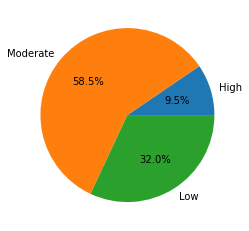

In [293]:
plt.pie(Adaptivity, labels=Order, autopct='%.1f%%')
plt.show()